# Проект: Статистический анализ данных

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

Описание данных
В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
Поездки — rides_go.csv
Подписки — subscriptions_go.csv

План работы:
* 1.Загрузка данных
* 2.Предобработка данных
* 3.Исследовательский анализ данных
* 4.Объединение данных
* 5.Подсчёт выручки
* 6.Проверка гипотез
* 7.Распределения

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
print(users.head())
print(rides.head())
print(subscriptions.head())

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra
   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28
  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


# Вывод 1
Данные загружены и проверены типы данных. Столбец датафрейма поездки "дата" требует перевода из типа object в тип date,для последующей работы.

#### Шаг 2. Предобработка данных

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [7]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [8]:
users.duplicated().sum()

31

In [9]:
print(users.value_counts())

user_id  name       age  city            subscription_type
209      Андрей     23   Омск            ultra                2
807      Александр  28   Екатеринбург    free                 2
611      Владимир   28   Омск            ultra                2
43       Стефания   22   Омск            ultra                2
737      Мелания    27   Ростов-на-Дону  free                 2
                                                             ..
520      Анжелика   30   Екатеринбург    ultra                1
519      Даниэль    22   Ростов-на-Дону  ultra                1
518      Алиса      22   Ростов-на-Дону  ultra                1
517      Олег       25   Краснодар       ultra                1
1534     Альберт    25   Краснодар       free                 1
Length: 1534, dtype: int64


In [10]:
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [11]:
users.duplicated().sum()

0

In [12]:
rides.duplicated().sum()

0

In [13]:
subscriptions.duplicated().sum()

0

In [14]:
users.isnull().sum().sort_values()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides.isnull().sum().sort_values()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
subscriptions.isnull().sum().sort_values()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

# Вывод 2
* Пропущенных значений в данных нет.
* Явные дубликаты в датафрейме пользователей удалены.

#### Шаг 3. Исследовательский анализ данных

In [17]:
import matplotlib.pyplot as plt

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

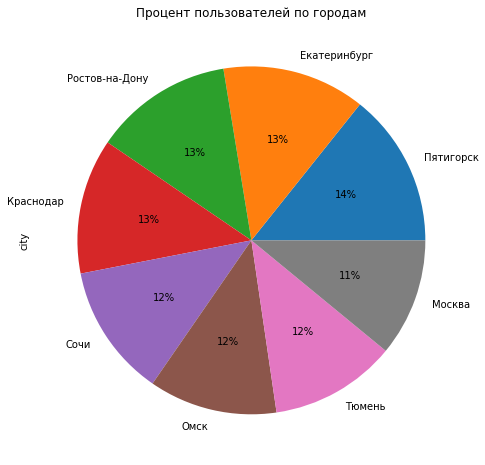

In [54]:
print(users['city'].describe())
cities = users['city']
users['city'].value_counts().plot(kind = 'pie', 
                                  y = cities,
                                  autopct = '%1.0f%%',
                                  figsize=(8,8), 
                                  title = 'Процент пользователей по городам')
users['city'].value_counts()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object


Text(0.5, 0.98, 'Тип подписки')

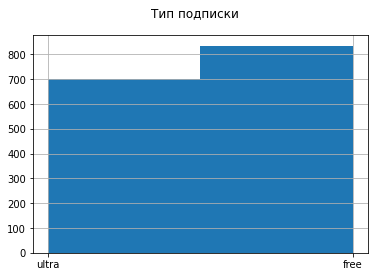

In [61]:
print(users['subscription_type'].describe())
users['subscription_type'].hist(bins=2)
plt.suptitle('Тип подписки')

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64


Text(0.5, 0.98, 'Распределение по возрасту')

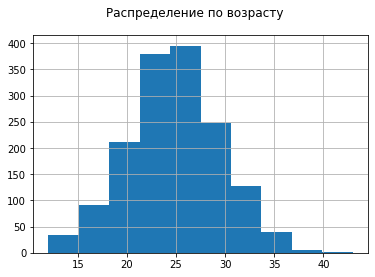

In [63]:
print(users['age'].describe())
users['age'].hist()
plt.suptitle('Распределение по возрасту')

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64


Text(0.5, 0.98, 'Дистанция поездки')

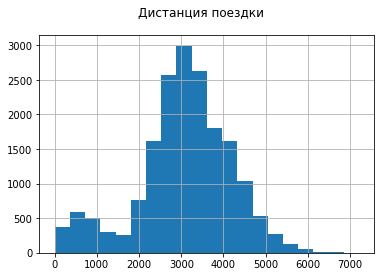

In [64]:
print(rides['distance'].describe())
rides['distance'].hist(bins=20)
plt.suptitle('Дистанция поездки')

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64


Text(0.5, 0.98, 'Длительность поездок')

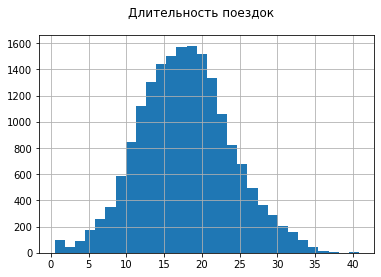

In [65]:
print(rides['duration'].describe())
rides['duration'].hist(bins=30)
plt.suptitle('Длительность поездок')

# Вывод 3
* Количество пользователей по городам распределно расвномерно с наибольшим количеством в Пятигорске.
* Количество пользоватлей без подписки больше пользователей с, и состовляет 835 пользователей ( с подпиской 699).
* Основной массив пользоватлей от 20 до 30 лет.
* В основном пользователи проезжают 2200-4300 метров.
* В основном продолжительность поездки от 8 до 24 минут (преимущественно 13-21). Поездки до минуты могли быть связаны с неисправностью самоката или недостатком средств на карте.

#### Шаг 4. Объединение данных

In [23]:
users_merge_1 = users.merge(rides, on='user_id', how='left')

In [58]:
users_merge_1.isnull().sum().sort_values()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
dtype: int64

In [24]:
users_merge_2 = users_merge_1.merge(subscriptions, on='subscription_type')

In [59]:
users_merge_2.isnull().sum().sort_values()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [60]:
users_merge_2['duration'] = np.ceil(users_merge_2['duration'])

In [25]:
users_with_sbs = users_merge_2.loc[users_merge_2['subscription_type'] == 'ultra']

In [26]:
users_without_sbs = users_merge_2.loc[users_merge_2['subscription_type'] == 'free']

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


Text(0.5, 0, 'Длительность в минутах')

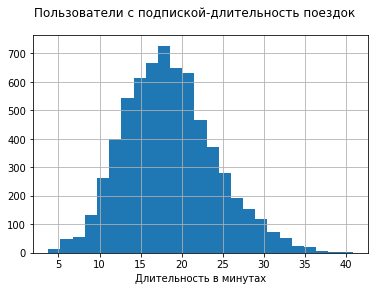

In [66]:
print(users_with_sbs['duration'].describe())
users_with_sbs['duration'].hist(bins=25)
plt.suptitle('Пользователи с подпиской-длительность поездок')
plt.xlabel('Длительность в минутах')

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


Text(0.5, 0, 'Длительность в минутах')

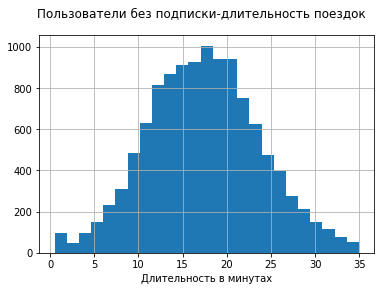

In [67]:
print(users_without_sbs['duration'].describe())
users_without_sbs['duration'].hist(bins=25)
plt.suptitle('Пользователи без подписки-длительность поездок')
plt.xlabel('Длительность в минутах')

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


Text(0.5, 0, 'Расстояние в метрах')

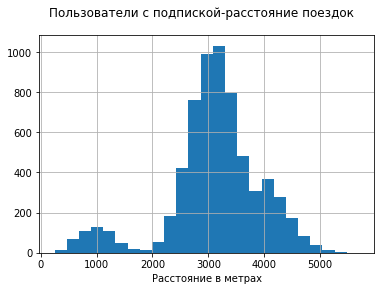

In [68]:
print(users_with_sbs['distance'].describe())
users_with_sbs['distance'].hist(bins=25)
plt.suptitle('Пользователи с подпиской-расстояние поездок')
plt.xlabel('Расстояние в метрах')

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64


Text(0.5, 0, 'Расстояние в метрах')

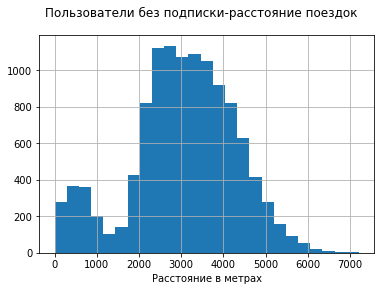

In [69]:
print(users_without_sbs['distance'].describe())
users_without_sbs['distance'].hist(bins=25)
plt.suptitle('Пользователи без подписки-расстояние поездок')
plt.xlabel('Расстояние в метрах')

# Вывод 4
* Объединили три исходных датафрейма в один users_merge 2
* Разделили данный датафрейм на два на основании наличия подписки - users_with_sbs, users_without_sbs
* Пользователи с подпиской проезжают в среднем за 13-23 минуты и на расстояние 2500-3500 метров.
* Пользователи без подписки проезжают в среднем от 10 до 25 минут и на расстояние от 2000  до 4500 метров.

На основании этих данных можем сделать вывод,что разнообразие типов поездок у пользователей без подписки шире,чем более усрдненные показатели у пользователей с подпиской. В целом пользователи без подписки проезжают большие расстояния.

#### Шаг 5. Подсчёт выручки

In [31]:
import numpy as np

In [32]:
data_aggregated_sbs = users_with_sbs.pivot_table(index=['month', 'user_id'],values = ['distance', 'duration', 'name'],aggfunc = {'distance': sum, 'duration' : sum, 'name' : len})
data_aggregated_sbs.rename(columns = {'name' : 'count'}, inplace = True)

In [33]:
data_aggregated_withoutsbs = users_without_sbs.pivot_table(index=['month', 'user_id'],values = ['distance', 'duration', 'name'],aggfunc = {'distance': sum, 'duration' : sum, 'name' : len})
data_aggregated_withoutsbs.rename(columns = {'name' : 'count'}, inplace = True)

In [34]:
def subscription_on(row):
        return 6 * row['duration'] + 199

In [35]:
data_aggregated_sbs['month_profit'] = data_aggregated_sbs.apply(subscription_on, axis=1)
data_aggregated_sbs

distance  duration  count  month_profit
month user_id                                            
1     1        7027.511294      42.0      2         451.0
      3        3061.777147      13.0      1         277.0
      5        3914.646990      13.0      1         277.0
      7        6478.080979      28.0      2         367.0
      12       3577.151148      33.0      1         397.0
...                    ...       ...    ...           ...
12    688      4004.404223      24.0      1         343.0
      689      3387.343067      19.0      1         313.0
      692      2947.000211      15.0      1         289.0
      694      3591.099488      18.0      1         307.0
      699      3202.890770      26.0      1         355.0

[4533 rows x 4 columns]

In [36]:
def subscription_off(row):
        return 8 * row['duration'] + 50 * row['count']

In [37]:
data_aggregated_withoutsbs['month_profit'] = data_aggregated_withoutsbs.apply(subscription_off, axis=1)
data_aggregated_withoutsbs

distance  duration  count  month_profit
month user_id                                            
1     700      2515.690719      15.0      1         170.0
      701      2676.472894      18.0      1         194.0
      702       903.861985      16.0      1         178.0
      703      3406.580225      24.0      1         242.0
      704      3197.139639      18.0      1         194.0
...                    ...       ...    ...           ...
12    1525     4597.854350      34.0      1         322.0
      1526     3644.121544      23.0      1         234.0
      1528     3998.569324      11.0      1         138.0
      1532     6111.889853      41.0      2         428.0
      1534     2371.711192      16.0      1         178.0

[6798 rows x 4 columns]

# Вывод 5
Создали два агрегированных датафрейма для пользователей с подпиской и без(data_aggregated_sbs и data_aggregated_withoutsbs,соответсвенно), с помесячным подсчётом для каждой пользователя:
* Количества поездок
* Общей продолжительности поездок
* Общего расстояния
* Выручки (месячной)

#### Шаг 6. Проверка гипотез

# Гипотеза 6.1

Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу.

In [38]:
 from scipy import stats as st

In [39]:
sbs = users_with_sbs['duration'] 
without_sbs = users_without_sbs['duration']
results = st.ttest_ind(sbs, without_sbs,alternative = 'greater')
alpha = 0.05
print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу:пользователи с подпиской тратят одинаковое время на поездки, чем пользователи без')
else:
    print('Не отвергаем нулевую гипотезу:пользователи с подпиской тратят одинаковое времени на поездки, чем пользователи без')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу:пользователи с подпиской тратят одинаковое время на поездки, чем пользователи без


# Вывод 6.1
Нулевая гипотеза,что пользователи с подпиской ультра и без неё тратят одинаковое время на поездки не подтвердилась. Альтернативную гипотезу,что время поездки у обладателей подписки больше не отвергаем.

# Гипотеза 6.2

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

In [70]:
sbs_dist = users_with_sbs['distance']
value = 3130.0
alpha = 0.05
results_2 = st.ttest_1samp(sbs_dist,value,alternative='greater')
print('p-значение:',results_2.pvalue)
if (results_2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


# Вывод 6.2
Не получилось отвергнуть гипотезу,что пользователи с подпиской за одну поездку проезжают 3130 метров,поэтому мы не можем утверждать,что они не проехали больше данного расстояния.

# Гипотеза 6.3
Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

In [41]:
sbs_month = data_aggregated_sbs['month_profit']
without_sbs_month = data_aggregated_withoutsbs['month_profit']
results_3 = st.ttest_ind(sbs_month, without_sbs_month,alternative = 'greater')
alpha = 0.05
print('p-значение:',results_3.pvalue)
if (results_3.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


# Вывод 6.3
Отвергнув нулевую гипотезу и подтвердив альтернативную 'greater', мы можем сделать вывод ,что среднемесячная выручка с пользователей с подпиской выше чем без.

# Гипотеза 6.4
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Метод, который нужно использовать для проверки гипотезы: scipy.stats.ttest_rel() ,так как проверяется гипотеза о равенстве среднего значения генеральной совокупности до и после изменения. Альтернативная гипотеза будет двусторонней,так как нас интересует "не равенство".

#### Шаг 7. Распределения

# 7.1 
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

0.04971489312694162


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


<BarContainer object of 1170 artists>

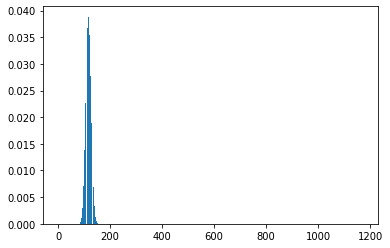

In [42]:
from math import sqrt
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 1169
p = 0.1

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 

result = distr.cdf(100)
print(result)
distr1 = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr1.append(current_value)
    
plt.bar(range(0, n + 1), distr1)


# Вывод 7.1
Для того чтобы выполнить план по привлчению новых клиентов с вероятностью 95%,требуется разослать рассылку 1169 пользователям.

# 7.2
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [44]:
n2 = 1000000
p2 = 0.4

mu2 = n2 * p2
sigma2 = sqrt(n2 * p2 * (1 - p2))
distr2 = st.norm(mu2, sigma2) 

result2 =distr2.cdf(399500)
print(result2)


0.8462829170363023


# Вывод 7.2
Вероятность того что уведомление откроют меньше 399.5 тысяч пользователей составляет 85%.

# ОБЩИЙ ВЫВОД



Загрузили 3 датафрейма: 
* Пользователи — users_go.csv
* Поездки — rides_go.csv
* Подписки — subscriptions_go.csv


Данные проверены:
* Пропущенных значений в данных нет.
* Явные дубликаты в датафрейме пользователей удалены.


Проведён исследовательский анализ данных:
* Количество пользователей по городам распределно расвномерно с наибольшим количеством в Пятигорске.
* Количество пользоватлей без подписки больше пользователей с, и состовляет 835 пользователей ( с подпиской 699).
* Основной массив пользоватлей от 20 до 30 лет.
* В основном пользователи проезжают 2200-4300 метров.
* В основном продолжительность поездки от 8 до 24 минут (преимущественно 13-21).

Проведено объединение трёх исходных датафреймов и анализ полученных данных:
* Объединили три исходных датафрейма в один users_merge 2
* Разделили данный датафрейм на два на основании наличия подписки - users_with_sbs, users_without_sbs
* Пользователи с подпиской проезжают в среднем за 13-23 минуты и на расстояние 2500-3500 метров.
* Пользователи без подписки проезжают в среднем от 10 до 25 минут и на расстояние от 2000  до 4500 метров.

Создали два агрегированных датафрейма для пользователей с подпиской и без(data_aggregated_sbs и data_aggregated_withoutsbs,соответсвенно), с помесячным подсчётом для каждой пользователя:
* Количества поездок
* Общей продолжительности поездок
* Общего расстояния
* Выручки (месячной)

Проверили гипотезы:
* Нулевая гипотеза,что пользователи с подпиской ультра и без неё тратят одинаковое время на поездки не подтвердилась. Альтернативную гипотезу,что время поездки у обладателей подписки больше не отвергаем.
* Не получилось отвергнуть гипотезу,что пользователи с подпиской за одну поездку проезжают 3130 метров,поэтому мы не можем утверждать,что они не проехали больше данного расстояния.
* Отвергнув нулевую гипотезу и подтвердив альтернативную 'greater', мы можем сделать вывод ,что среднемесячная выручка с пользователей с подпиской выше чем без.

Оценили и дали ответы на вопросы про распредениям.